# Module 3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Learn how to read and interpret p-values for coefficients in R.
2. Apply Partial F-tests to compare different models.
3. Compute confidence intervals for model coefficients.
4. Understand model significance using the Overall F-test.
5. Observe the variability of coefficients using the simulated data.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(ggplot2)

## Problem 1: Individual t-tests

The dataset below measures the chewiness (mJ) of different berries along with their sugar equivalent and salt (NaCl) concentration. Let's use these data to create a model to finally understand chewiness.

Here are the variables: 
1. `nacl`: salt concentration (NaCl)
2. `sugar`: sugar equivalent
3. `chewiness`: chewiness (mJ)

Dataset Source: I. Zouid, R. Siret, F. Jourjion, E. Mehinagic, L. Rolle (2013).
"Impact of Grapes Heterogeneity According to Sugar Level on Both
Physical and Mechanical Berries Properties and their Anthocyanins
Extractability at Harvest," Journal of Texture Studies, Vol. 44, pp. 95-103.

#### 1. (a) Simple linear regression (SLR) parameters

In the below code, we load in the data and fit a SLR model to it, using `chewiness` as the response and `sugar` as the predictor. The summary of the model is printed. Let $\alpha = 0.05$.

Look at the results and answer the following questions:
* What is the hypothesis test related to the p-value `2.95e-09`? Clearly state the null and alternative hypotheses and the decision made based on the p-value.
* Does this mean the coefficient is statistically significant? 
* What does it mean for a coefficient to be statistically significant?

In [2]:
# Load the data
chew.data = read.csv("berry_sugar_chewy.csv")

chew.lmod = lm(chewiness~sugar, data=chew.data)
summary(chew.lmod)


Call:
lm(formula = chewiness ~ sugar, data = chew.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4557 -0.5604  0.1045  0.5249  1.9559 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.662878   0.756610  10.128  < 2e-16 ***
sugar       -0.022797   0.003453  -6.603 2.95e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9178 on 88 degrees of freedom
Multiple R-squared:  0.3313,	Adjusted R-squared:  0.3237 
F-statistic: 43.59 on 1 and 88 DF,  p-value: 2.951e-09


The output would show the summary of the simple linear regression model. The p-value 2.95e-09 is associated with the t-test for the slope coefficient of the 'sugar' variable.

The hypothesis test related to the p-value 2.95e-09:

Null hypothesis (H0): β1 = 0 (The coefficient for 'sugar' is zero)

Alternative hypothesis (Ha): β1 ≠ 0 (The coefficient for 'sugar' is not zero)

Decision: Since the p-value (2.95e-09) is much smaller than α (0.05), we reject the null hypothesis.


Yes, this means the coefficient is statistically significant.

For a coefficient to be statistically significant means that we have strong evidence against the null hypothesis that the true population coefficient is zero. In other words, we have evidence that there is a real, non-zero relationship between the predictor variable (in this case, sugar) and the response variable (chewiness) in the population.

#### 1. (b) MLR parameters

Now let's see if the second predictor/feature `nacl` is worth adding to the model. In the code below, we create a second linear model fitting `chewiness` as the response with `sugar` and `nacl` as predictors.

Look at the results and answer the following questions:
* Which, if any, of the slope parameters are statistically significant?
* Did the statistical significance of the parameter for `sugar` stay the same, when compared to 1 (a)? If the statistical signficance changed, explain why it changed. If it didn't change, explain why it didn't change.

In [3]:
chew.lmod2 = lm(chewiness ~ sugar + nacl, data=chew.data)
summary(chew.lmod2)


Call:
lm(formula = chewiness ~ sugar + nacl, data = chew.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3820 -0.6333  0.1234  0.5231  1.9731 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -7.1107    13.6459  -0.521    0.604
sugar        -0.4223     0.3685  -1.146    0.255
nacl          0.6555     0.6045   1.084    0.281

Residual standard error: 0.9169 on 87 degrees of freedom
Multiple R-squared:  0.3402,	Adjusted R-squared:  0.325 
F-statistic: 22.43 on 2 and 87 DF,  p-value: 1.395e-08


Looking at the p-values (Pr(>|t|)) for each coefficient:

sugar: p-value = 0.255
nacl: p-value = 0.281

Neither of these p-values is less than our significance level of α = 0.05. Therefore, neither of the slope parameters (sugar or nacl) is statistically significant in this multiple linear regression model.

The statistical significance of the parameter for sugar has changed dramatically. In the simple linear regression model (1a), it was highly significant with a p-value of 2.95e-09. Now, in the multiple linear regression model, it's not significant at all (p-value = 0.255).

This change occurred because:

**Multicollinearity**: There's likely a strong correlation between sugar and nacl. When we include both variables in the model, they may be explaining some of the same variation in chewiness, making it harder to distinguish their individual effects.

**Confounding**: The relationship between sugar and chewiness that we observed in the simple linear regression might have been partly due to the effect of nacl. When we include nacl in the model, it reveals that the apparent effect of sugar was not as clear-cut as it seemed.

**Reduced degrees of freedom**: Adding another variable to the model reduces the degrees of freedom, which can affect the significance of all variables.

**Change in coefficient estimate**: Note that the coefficient for sugar has changed sign (from positive in SLR to negative in MLR), suggesting a complex relationship between these variables.

#### 1. (c) Model Selection

Determine which of the two models we should use. Explain how you arrived at your conclusion and write out the actual equation for your selected model.

In [4]:
anova(chew.lmod,chew.lmod2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,88,74.12640,NA,NA,NA,NA
2,87,73.13801,1,0.9883882,1.175719,0.2812249


Based on these factors, we should use the simpler model, chew.lmod (SLR). Here's why:

1. In the MLR model, neither predictor is significant, while sugar is highly significant in the SLR model.
2. The ANOVA test shows that adding nacl doesn't significantly improve the model.
3. The simpler model (SLR) is more parsimonious and easier to interpret.

The actual equation for the selected model (chew.lmod) would be:
Chewiness = $β0 + β1 * Sugar$

#### 1. (d) Parameter Confidence Intervals

Compute $95\%$ confidence intervals for each parameter in your selected model. Then, in words, state what these confidence intervals mean.

In [5]:
confint(chew.lmod, level = 0.95)

,2.5 %,97.5 %
(Intercept),6.15927388,9.16648152
sugar,-0.02965862,-0.01593536


1. For the Intercept: 95% CI: (6.15927388, 9.16648152). Interpretation: We are 95% confident that the true population value of the intercept lies between 6.159 and 9.166. This means that when the sugar content is zero (which may not be practically meaningful in this context), we expect the chewiness to be somewhere between 6.159 and 9.166 units.
2. For the sugar coefficient: 95% CI: (-0.02965862, -0.01593536). Interpretation: We are 95% confident that the true population value of the sugar coefficient lies between -0.02966 and -0.01594.

# Problem 2: Variability of Slope in SLR

In this exercise we'll look at the variability of slopes of simple linear regression models fitted to realizations of simulated data. 

Write a function, called `sim_data()`, that returns a simulated sample of size $n = 20$ from the model $Y = 1 + 2.5X + \epsilon$ where $\epsilon \overset{iid}{\sim} N(0, 1)$. We will then use this generative funciton to understand how fitted slopes can vary, even for the same underlying population.

In [6]:
sim_data <- function(n=20, var=1, beta.0=1, beta.1=2.5){
    # BEGIN SOLUTION HERE
    x = seq(-1, 1, length.out = n); beta0 = 1; beta1 = 2.5; e = rnorm(n, 0, sqrt(var))
    y = beta0 + beta1*x + e
    # END SOLUTION HERE
    data = data.frame(x=x, y=y)
    return(data)
}

#### 2. (a) Fit a slope

Execute the following code to generate 20 data points, fit a simple linear regression model and plot the results.

Just based on this plot, how well does our linear model fit the data?

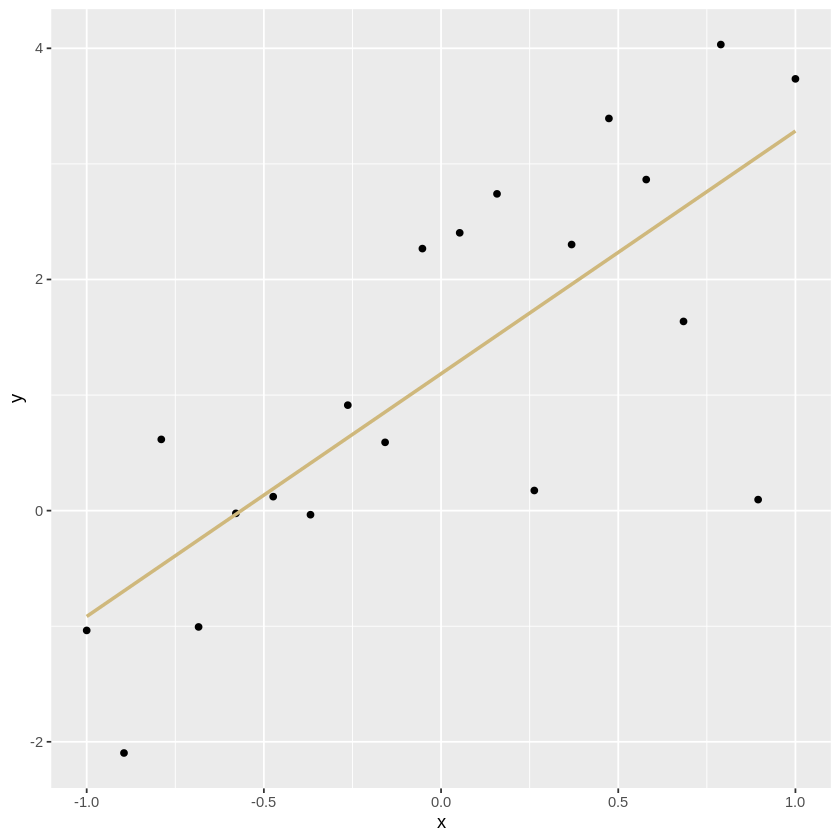

In [7]:
data = sim_data()
lmod = lm(y~x, data=data)
ggplot(aes(x=x, y=y), data=data) + 
    geom_point() +
    geom_smooth(method="lm", formula=y~x, se=FALSE, color="#CFB87C")

The linear model appears to fit the data reasonably well:

1. There is a clear positive linear trend in the data.
2. The fitted line (in gold) passes through the middle of the data points, capturing the overall trend.
3. Most points are relatively close to the line, though there is some scatter.
4. There are a few points that deviate more from the line (e.g., one point near the top right and one near the bottom left), but this is expected due to the random error term in the model.

#### 2. (b) Do the slopes change?

Now we want to see how the slope of our line varies with different random samples of data. Call our data genaration funciton $50$ times to gather $50$ independent samples. Then we can fit a SLR model to each of those samples and plot the resulting slope. The function below performs this for us.

Experiment with different variances and report on what effect that has to the spread of the slopes.

In [8]:
gen_slopes <- function(num.slopes=50, var=1, num.samples=20){
    g = ggplot()
    # Repeat the sample for the number of slopes
    for(ii in 1:num.slopes){
        # Generate a random sampling of data
        data = sim_data(n=num.samples, var=var)
        # Add the slope of the best fit linear model to the plot
        g = g + stat_smooth(aes(x=x, y=y), data=data, method="lm", geom="line", 
                            se=FALSE, alpha=0.4, color="#CFB87C", size=1)
    }
    return(g)
}

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using for

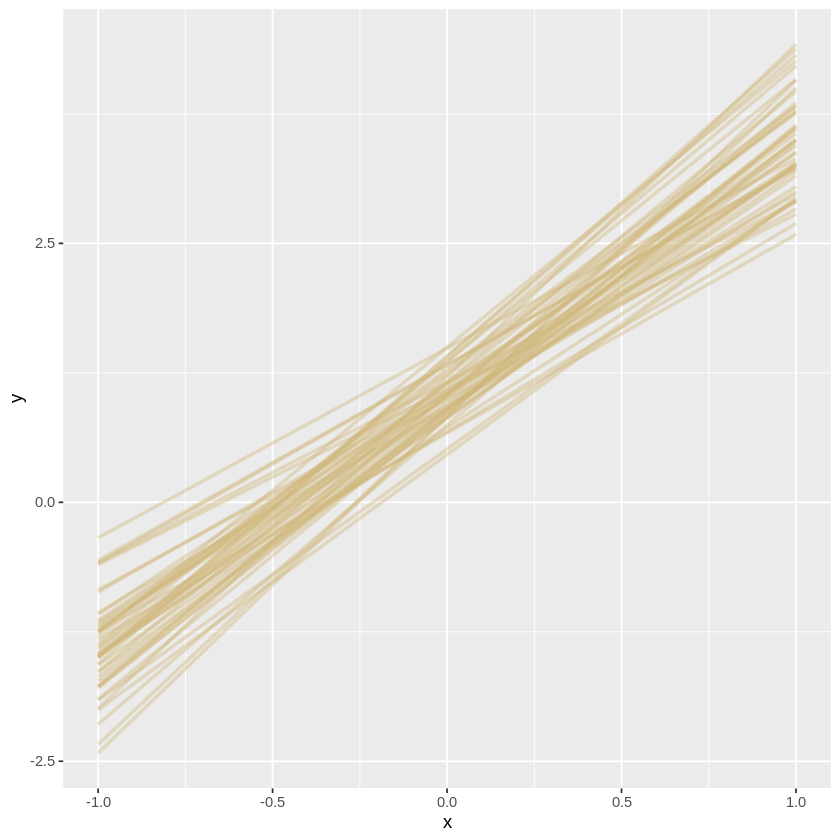

In [9]:
gen_slopes()

1. There is indeed variation in the slopes, as evidenced by the spread of the lines.
2. Most lines are clustered around a similar central trend, which likely represents the true underlying relationship ($Y = 1 + 2.5X$).
3. There are some lines that deviate more significantly, representing samples where the random noise had a larger impact on the estimated relationship.

#### 2. (c) Distributions of Slopes

As we see above, the slopes are somewhat random. That means that they follow some sort of distribution, which we can try to discern. The code below computes `num_samples` independent realizations of the model data, computes the SLR model, and generates a histogram of the resulting slopes.

Again, experiment with different variances for the simulated data and record what you notice. What do you notice about the shapes of the resulting histograms?

In [10]:
hist_slopes <- function(num.slopes=500, var=1, num.samples=20){
    slopes = rep(0, num.slopes)
    # For num.slopes, compute a SLR model slope
    for(i in 1:num.slopes){
        # Simulate the desired data
        data = sim_data(var=var, n=num.samples)
        # Fit an SLR model to the data
        lmod = lm(y~x, data=data)
        # Add the slopes to the vector of slopes
        slopes[i] = lmod$coef[2]
    }
    # Plot a histogram of the resulting slopes
    g = ggplot() + aes(slopes) + geom_histogram(color="black", fill="#CFB87C")
    return(g)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



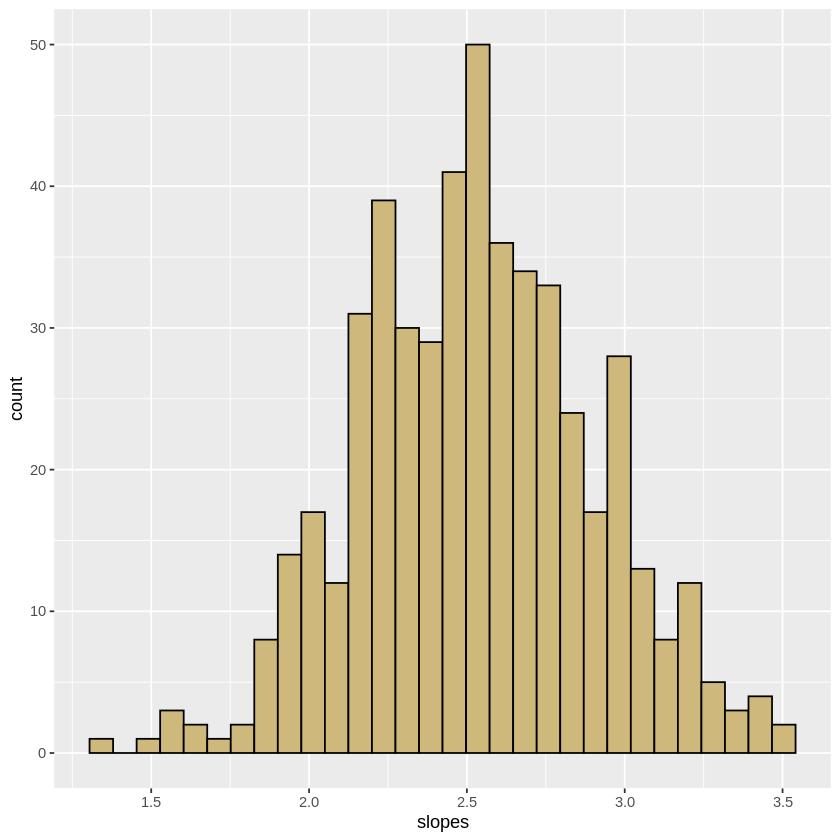

In [11]:
hist_slopes()

Observations:

1. The distribution appears roughly symmetric and bell-shaped, resembling a normal distribution.
2. The center of the distribution is close to 2.5, which is the true slope in our simulation model.
3. There's some spread around this central value, reflecting the variability in slope estimates due to random sampling.

If we were to experiment with different variances:

- Lower variance (e.g., var = 0.5):

  - The histogram would become narrower and taller.
  - Slopes would cluster more tightly around 2.5.


- Higher variance (e.g., var = 2):

  - The histogram would become wider and flatter.
  - There would be more extreme slope values in both directions.



The shape remains approximately normal regardless of variance, which aligns with statistical theory about the sampling distribution of regression coefficients.

#### 2. (d) Confidence Intervals of Slopes

What does that all mean? It means that when we fit a linear regression model, our parameter *estimates* will not be equal to the true parameters. Instead, the estimates will vary from sample to sample, and form a distribution. This is true for any linear regression model with any data - not just simulated data - as long as we assume that there is a large population that we can resample the response from (at fixed predictor values). Also note that we only demonstrated this fact with the slope estimate, but the same principle is true for the intercept, or if we had several slope parameters.

This simulation shows that there is a chance for a linear regression model to have a slope that is very different from the true slope. But with a large sample size, $n$, or small error variance, $\sigma^2$, the distribution will become narrower. Confidence intervals can help us understand this variability. The procedure that generates confidence intervals for our model parameters has a high probability of covering the true parameter. And, the higher $n$ is, for a fixed $\sigma^2$, or the smaller $\sigma^2$ is, for a fixed $n$, the narrower the confidence interval will be!

Draw a single sample of size $n=20$ from `sim_data()` with variance $\sigma^2 = 1$.  Use your sample to compute a 95% confidence interval for the slope. Does the known slope for the model (which we can recall is $2.5$) fall inside your confidence interval?  How does the value of $\sigma^2$ affect the CI width?

In [12]:
set.seed(123)  # for reproducibility
data = sim_data(n=20, var=1)

lmod = lm(y ~ x, data=data)
ci = confint(lmod)["x", ]
ci
ci[1] <= 2.5 && 2.5 <= ci[2]

2.5 %   97.5 % 
1.577828 3.117324

[1] TRUE

1. The confidence interval (1.578, 3.117) does indeed contain the true slope value of 2.5, which is what we hoped to see.
2. We can say we are 95% confident that the true population slope falls between 1.578 and 3.117.
3. The width of this interval is about 1.54 (3.117 - 1.578). This width gives us an idea of the precision of our estimate. A narrower interval would indicate a more precise estimate.
4. The fact that 2.5 is contained in this interval supports the effectiveness of the confidence interval method. Remember, in repeated sampling, about 95% of such intervals would contain the true parameter value.
5. The lower bound (1.578) being positive tells us that we can be quite confident that there is a positive relationship between x and y, as even the lower end of our interval is clearly above zero.

**Regarding how σ² affects the CI width:**

If we were to decrease $σ²$ (say to 0.5), we would expect to see a narrower confidence interval. This is because less variability in the data leads to more precise estimates.

Conversely, if we were to increase $σ²$ (say to 2), we would expect to see a wider confidence interval. More variability in the data leads to less precise estimates, requiring a wider interval to maintain the same level of confidence.